In [13]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Import modules
import os 
import scipy.io
from scipy import stats
from __future__ import print_function
import pandas as pd

import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load Data from .mat files

In [14]:

test=scipy.io.loadmat('idp_connectome_aparc_length.mat')
aparcl=np.array(test['connectome_aparc_length'])
print(aparcl.shape)

test=scipy.io.loadmat('idp_connectome_aparc_count.mat')
aparcc=np.array(test['connectome_aparc_count'])
print(aparcc.shape)

test=scipy.io.loadmat('idp_connectome_aparc2009_length.mat')
aparc2l=np.array(test['connectome_aparc2009_length'])
print(aparc2l.shape)

test=scipy.io.loadmat('idp_connectome_aparc2009_count.mat')
aparc2c=np.array(test['connectome_aparc2009_count'])
print(aparc2c.shape)

(84, 84, 211)
(84, 84, 211)
(164, 164, 211)
(164, 164, 211)


## Zeropad smaller data, reorganize shape

In [15]:
zeromatal=np.zeros([164,164,211])
zeromatac=np.zeros([164,164,211])

zeromatal[40:124,40:124,:]=aparcl
zeromatac[40:124,40:124,:]=aparcc

aparcl=zeromatal
aparcc=zeromatac

X=np.zeros([164,164,211,4])
X[:,:,:,0]=aparcl
X[:,:,:,1]=aparcc
X[:,:,:,2]=aparc2l
X[:,:,:,3]=aparc2c

X=X.transpose([2,0,1,3])
print(X.shape)

(211, 164, 164, 4)


In [16]:
datasubjid=pd.read_csv('idp_data_1_mor.csv',header=0)
datasubjid=np.array(datasubjid)
datasubjid=datasubjid[:,0]
print(datasubjid.shape)
matsubjid=pd.read_csv('idp_connectome_subjectlist.csv',header=0)
matsubjid=np.array(matsubjid)
print(matsubjid.shape)

filtindex=np.isin(matsubjid,datasubjid)
filtindex=filtindex.ravel()

X=X[filtindex,:,:,:]
print(X.shape)








(208,)
(211, 1)
(208, 164, 164, 4)



## load labels, index data for all 6 types

In [17]:
# Load the labels for each type

data=pd.read_csv('idp_data_1_mor.csv',header=0)
data=np.array(data)

ad_smi=data[:,5]
mci_smi=data[:,6]
ad_mci=data[:,7]

adonly_smi=data[:,8]
adonly_mci=data[:,9]
adonly_adwithsmallvv=data[:,10]

# load the morphometry 
data=pd.read_csv('idp_data_1_mor.csv',header=0)
data=np.array(data)
print(data.shape)
mask=np.ones([959])
mask[0:3]=0
mask[5:11]=0
mask=mask>=1

morphdata=data[:,mask]
print(morphdata.shape)
# remove columns 0 1 2 5 6 7 8 9 10
# Q? V, W

ind_num=np.isnan(morphdata)
test=ind_num*1
result=np.sum(test,axis=0)
nanmask=result<1
morphdata=morphdata[:,nanmask]

# create X, y, Xvar for each type

ind_num=np.isnan(ad_smi)
y_adsmi=ad_smi[~ind_num]
X_adsmi=X[~ind_num,:,:,:]
Xvar_adsmi=morphdata[~ind_num,:]

ind_num=np.isnan(mci_smi)
y_mcismi=mci_smi[~ind_num]
X_mcismi=X[~ind_num,:,:,:]
Xvar_mcismi=morphdata[~ind_num,:]

ind_num=np.isnan(ad_mci)
y_admci=ad_mci[~ind_num]
X_admci=X[~ind_num,:,:,:]
Xvar_admci=morphdata[~ind_num,:]


# not really used
ind_num=np.isnan(adonly_smi)
y_adonlysmi=adonly_smi[~ind_num]
X_adonlysmi=X[~ind_num,:,:,:]
Xvar_adonly_smi=morphdata[~ind_num,:]

ind_num=np.isnan(adonly_mci)
y_adonlymci=adonly_mci[~ind_num]
X_adonlymci=X[~ind_num,:,:,:]
Xvar_adonlymci=morphdata[~ind_num,:]

ind_num=np.isnan(adonly_adwithsmallvv)
y_adonlyadwithsmallvv=adonly_adwithsmallvv[~ind_num]
X_adonlyadwithsmallvv=X[~ind_num,:,:,:]
Xvar_adonlyadwithsmallvv=morphdata[~ind_num,:]

(208, 959)
(208, 950)


## Run CNN with 5fold Cross validation for AD_SMI

Number of training points:  (116,)
Number of testing points:  (30,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 11
epoch 1 
Best validation accuracy! iteration:11 accuracy: 80.0%
epoch 2 
Best validation accuracy! iteration:22 accuracy: 86.66666666666667%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
Best validation accuracy! iteration:88 accuracy: 90.0%
epoch 9 
epoch 10 
Best validation accuracy! iteration:110 accuracy: 93.33333333333333%
epoch 11 
epoch 12 
Best validation accuracy! iteration:132 accuracy: 96.66666666666667%
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epo

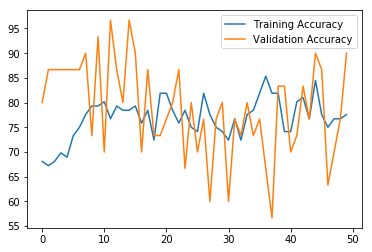

Number of training points:  (117,)
Number of testing points:  (29,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 11
epoch 1 
Best validation accuracy! iteration:11 accuracy: 72.41379310344828%
epoch 2 
epoch 3 
epoch 4 
Best validation accuracy! iteration:44 accuracy: 75.86206896551724%
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 75.86206896551724. Model named nnn_1522182744.


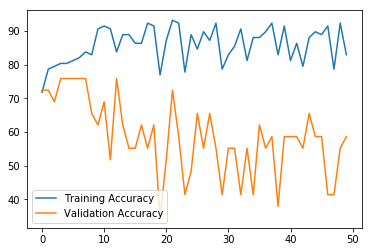

Number of training points:  (117,)
Number of testing points:  (29,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 11
epoch 1 
Best validation accuracy! iteration:11 accuracy: 68.9655172413793%
epoch 2 
Best validation accuracy! iteration:22 accuracy: 72.41379310344828%
epoch 3 
Best validation accuracy! iteration:33 accuracy: 75.86206896551724%
epoch 4 
epoch 5 
Best validation accuracy! iteration:55 accuracy: 79.3103448275862%
epoch 6 
Best validation accuracy! iteration:66 accuracy: 82.75862068965517%
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
Best validation accuracy! iteration:143 accuracy: 86.20689655172414%
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
Best validation accuracy! iteration:319 accuracy: 89.65517241379311%
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epo

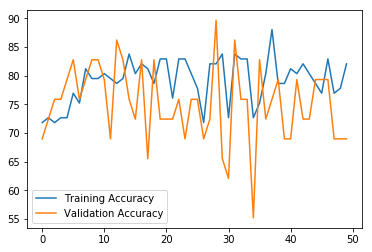

Number of training points:  (117,)
Number of testing points:  (29,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 11
epoch 1 
Best validation accuracy! iteration:11 accuracy: 68.9655172413793%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
Best validation accuracy! iteration:55 accuracy: 72.41379310344828%
epoch 6 
Best validation accuracy! iteration:66 accuracy: 75.86206896551724%
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
Best validation accuracy! iteration:121 accuracy: 79.3103448275862%
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy 

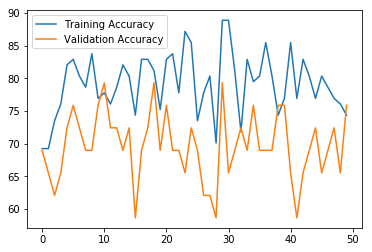

Number of training points:  (117,)
Number of testing points:  (29,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 11
epoch 1 
Best validation accuracy! iteration:11 accuracy: 65.51724137931035%
epoch 2 
epoch 3 
Best validation accuracy! iteration:33 accuracy: 72.41379310344828%
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 72.41379310344828. Model named nnn_1522182840.


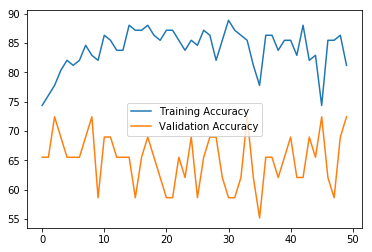

Number of training points:  (116,)
Number of testing points:  (30,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 11
epoch 1 
Best validation accuracy! iteration:11 accuracy: 86.66666666666667%
epoch 2 
epoch 3 
Best validation accuracy! iteration:33 accuracy: 90.0%
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 90.0. Model named nnn_1522182869.


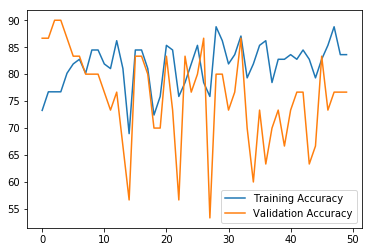

Number of training points:  (117,)
Number of testing points:  (29,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 11
epoch 1 
Best validation accuracy! iteration:11 accuracy: 65.51724137931035%
epoch 2 
epoch 3 
epoch 4 
Best validation accuracy! iteration:44 accuracy: 72.41379310344828%
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
Best validation accuracy! iteration:110 accuracy: 75.86206896551724%
epoch 11 
Best validation accuracy! iteration:121 accuracy: 82.75862068965517%
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accura

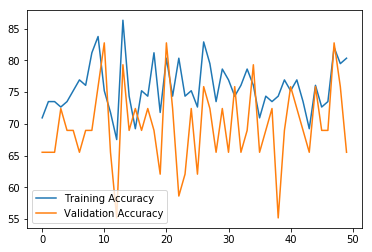

Number of training points:  (117,)
Number of testing points:  (29,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 11
epoch 1 
Best validation accuracy! iteration:11 accuracy: 68.9655172413793%
epoch 2 
epoch 3 
Best validation accuracy! iteration:33 accuracy: 75.86206896551724%
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
Best validation accuracy! iteration:88 accuracy: 79.3103448275862%
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
Best validation accuracy! iteration:154 accuracy: 86.20689655172414%
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy 

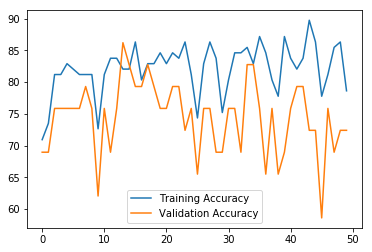

Number of training points:  (117,)
Number of testing points:  (29,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 11
epoch 1 
Best validation accuracy! iteration:11 accuracy: 68.9655172413793%
epoch 2 
epoch 3 
epoch 4 
Best validation accuracy! iteration:44 accuracy: 72.41379310344828%
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 72.41379310344828. Model named nnn_1522182961.


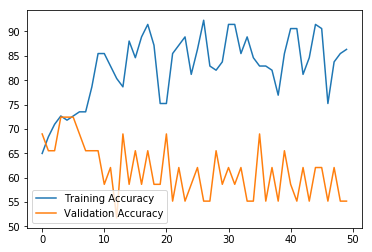

Number of training points:  (117,)
Number of testing points:  (29,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 11
epoch 1 
Best validation accuracy! iteration:11 accuracy: 62.06896551724138%
epoch 2 
epoch 3 
Best validation accuracy! iteration:33 accuracy: 68.9655172413793%
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
Best validation accuracy! iteration:165 accuracy: 72.41379310344828%
epoch 16 
epoch 17 
epoch 18 
epoch 19 
Best validation accuracy! iteration:209 accuracy: 75.86206896551724%
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
Best validation accuracy! iteration:330 accuracy: 79.3103448275862%
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47

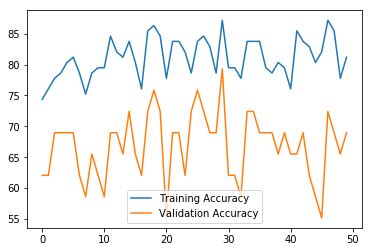

Number of training points:  (116,)
Number of testing points:  (30,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 11
epoch 1 
Best validation accuracy! iteration:11 accuracy: 66.66666666666666%
epoch 2 
Best validation accuracy! iteration:22 accuracy: 70.0%
epoch 3 
epoch 4 
Best validation accuracy! iteration:44 accuracy: 73.33333333333333%
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
Best validation accuracy! iteration:110 accuracy: 80.0%
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 80.0. Model named nnn

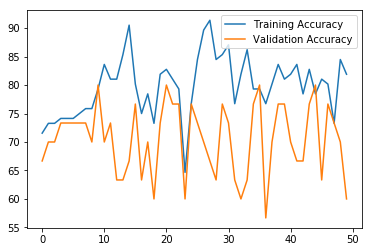

Number of training points:  (117,)
Number of testing points:  (29,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 11
epoch 1 
Best validation accuracy! iteration:11 accuracy: 58.62068965517241%
epoch 2 
Best validation accuracy! iteration:22 accuracy: 68.9655172413793%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
Best validation accuracy! iteration:77 accuracy: 72.41379310344828%
epoch 8 
epoch 9 
epoch 10 
epoch 11 
Best validation accuracy! iteration:121 accuracy: 75.86206896551724%
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
Best validation accuracy! iteration:231 accuracy: 79.3103448275862%
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 

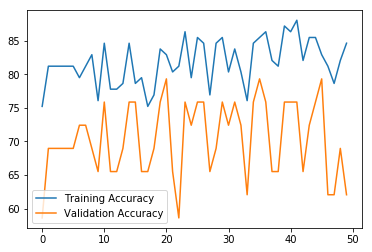

Number of training points:  (117,)
Number of testing points:  (29,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 11
epoch 1 
Best validation accuracy! iteration:11 accuracy: 68.9655172413793%
epoch 2 
Best validation accuracy! iteration:22 accuracy: 72.41379310344828%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 72.41379310344828. Model named nnn_1522183087.


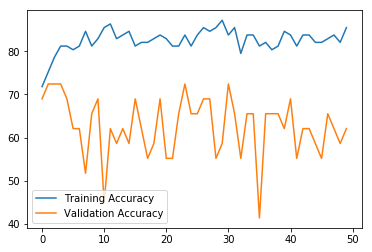

Number of training points:  (117,)
Number of testing points:  (29,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 11
epoch 1 
Best validation accuracy! iteration:11 accuracy: 72.41379310344828%
epoch 2 
epoch 3 
Best validation accuracy! iteration:33 accuracy: 75.86206896551724%
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
Best validation accuracy! iteration:88 accuracy: 79.3103448275862%
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
Best validation accuracy! iteration:176 accuracy: 82.75862068965517%
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
Best validation accuracy! iteration:286 accuracy: 86.20689655172414%
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47

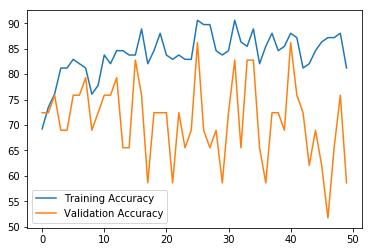

Number of training points:  (117,)
Number of testing points:  (29,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 11
epoch 1 
Best validation accuracy! iteration:11 accuracy: 75.86206896551724%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
Best validation accuracy! iteration:121 accuracy: 82.75862068965517%
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 82.75862068965517. Model named nnn_1522183148.


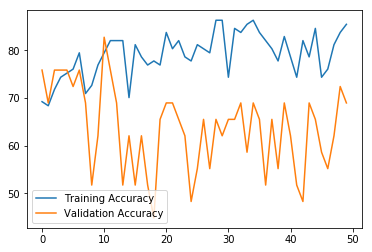

Number of training points:  (116,)
Number of testing points:  (30,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 11
epoch 1 
Best validation accuracy! iteration:11 accuracy: 76.66666666666667%
epoch 2 
Best validation accuracy! iteration:22 accuracy: 83.33333333333333%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
Best validation accuracy! iteration:176 accuracy: 86.66666666666667%
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 86.66666666666667. Model named nnn_1522183177.


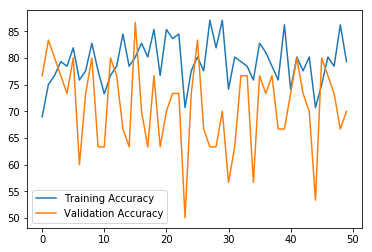

Number of training points:  (117,)
Number of testing points:  (29,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 11
epoch 1 
Best validation accuracy! iteration:11 accuracy: 68.9655172413793%
epoch 2 
Best validation accuracy! iteration:22 accuracy: 82.75862068965517%
epoch 3 
epoch 4 
Best validation accuracy! iteration:44 accuracy: 86.20689655172414%
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 86.20689655172414. Model named nnn_1522183208.


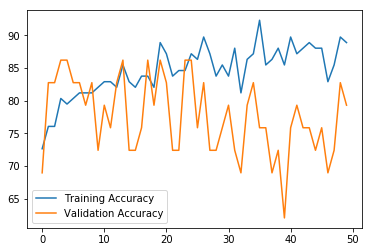

Number of training points:  (117,)
Number of testing points:  (29,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 11
epoch 1 
Best validation accuracy! iteration:11 accuracy: 65.51724137931035%
epoch 2 
epoch 3 
Best validation accuracy! iteration:33 accuracy: 68.9655172413793%
epoch 4 
Best validation accuracy! iteration:44 accuracy: 72.41379310344828%
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
Best validation accuracy! iteration:121 accuracy: 75.86206896551724%
epoch 12 
epoch 13 
epoch 14 
epoch 15 
Best validation accuracy! iteration:165 accuracy: 86.20689655172414%
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47

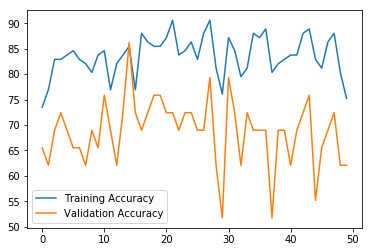

Number of training points:  (117,)
Number of testing points:  (29,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 11
epoch 1 
Best validation accuracy! iteration:11 accuracy: 55.172413793103445%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
Best validation accuracy! iteration:55 accuracy: 58.62068965517241%
epoch 6 
epoch 7 
epoch 8 
epoch 9 
Best validation accuracy! iteration:99 accuracy: 65.51724137931035%
epoch 10 
epoch 11 
epoch 12 
Best validation accuracy! iteration:132 accuracy: 68.9655172413793%
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
Best validation accuracy! iteration:187 accuracy: 75.86206896551724%
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 4

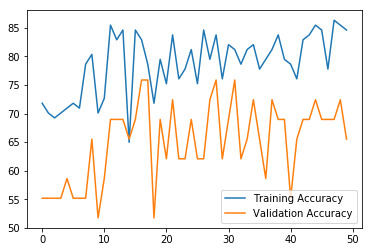

Number of training points:  (117,)
Number of testing points:  (29,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 11
epoch 1 
Best validation accuracy! iteration:11 accuracy: 75.86206896551724%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
Best validation accuracy! iteration:99 accuracy: 82.75862068965517%
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
Best validation accuracy! iteration:506 accuracy: 86.20689655172414%
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 86.20689655172414. Model named nnn_1522183303.


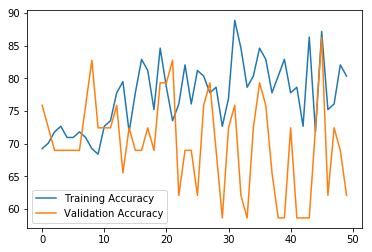

Number of training points:  (116,)
Number of testing points:  (30,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 11
epoch 1 
Best validation accuracy! iteration:11 accuracy: 60.0%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
Best validation accuracy! iteration:88 accuracy: 66.66666666666666%
epoch 9 
Best validation accuracy! iteration:99 accuracy: 70.0%
epoch 10 
epoch 11 
epoch 12 
Best validation accuracy! iteration:132 accuracy: 73.33333333333333%
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
Best validation accuracy! iteration:209 accuracy: 76.66666666666667%
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
Best validation accuracy! iteration:297 accuracy: 80.0%
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 4

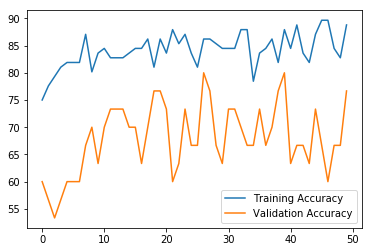

Number of training points:  (117,)
Number of testing points:  (29,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 11
epoch 1 
Best validation accuracy! iteration:11 accuracy: 75.86206896551724%
epoch 2 
epoch 3 
Best validation accuracy! iteration:33 accuracy: 79.3103448275862%
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
Best validation accuracy! iteration:121 accuracy: 82.75862068965517%
epoch 12 
Best validation accuracy! iteration:132 accuracy: 86.20689655172414%
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
Best validation accuracy! iteration:319 accuracy: 89.65517241379311%
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 4

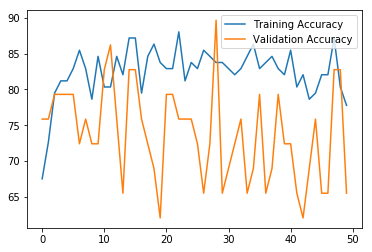

Number of training points:  (117,)
Number of testing points:  (29,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 11
epoch 1 
Best validation accuracy! iteration:11 accuracy: 72.41379310344828%
epoch 2 
Best validation accuracy! iteration:22 accuracy: 79.3103448275862%
epoch 3 
epoch 4 
Best validation accuracy! iteration:44 accuracy: 82.75862068965517%
epoch 5 
epoch 6 
Best validation accuracy! iteration:66 accuracy: 86.20689655172414%
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy 

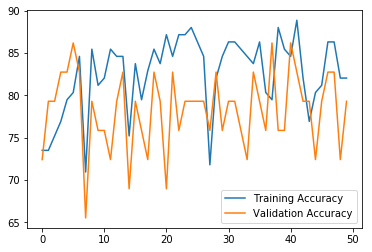

Number of training points:  (117,)
Number of testing points:  (29,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 11
epoch 1 
Best validation accuracy! iteration:11 accuracy: 72.41379310344828%
epoch 2 
Best validation accuracy! iteration:22 accuracy: 75.86206896551724%
epoch 3 
epoch 4 
Best validation accuracy! iteration:44 accuracy: 79.3103448275862%
epoch 5 
Best validation accuracy! iteration:55 accuracy: 82.75862068965517%
epoch 6 
Best validation accuracy! iteration:66 accuracy: 86.20689655172414%
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 


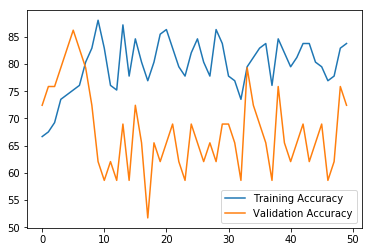

Number of training points:  (117,)
Number of testing points:  (29,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 11
epoch 1 
Best validation accuracy! iteration:11 accuracy: 68.9655172413793%
epoch 2 
Best validation accuracy! iteration:22 accuracy: 72.41379310344828%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 72.41379310344828. Model named nnn_1522183463.


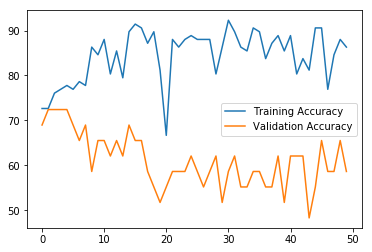

AD_SMI average accuracy is:  82.4367816091954
AD_SMI standard deviation is:  6.359220722846163


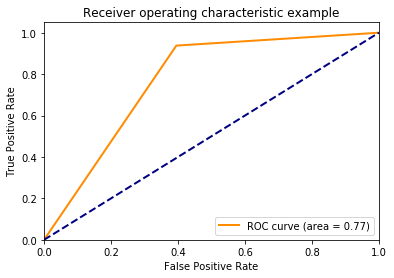

In [18]:
from sklearn.model_selection import RepeatedStratifiedKFold
from CNN_codes.NNN_test import nnn_training
from sklearn.metrics import roc_curve, auc

rskf=RepeatedStratifiedKFold(n_splits=5,n_repeats=5)
store_acc=[]
prediction=[]
truelabel=[]
for train_index,test_index in rskf.split(Xvar_adsmi,y_adsmi):
    print("Number of training points: ",train_index.shape)
    print('Number of testing points: ',test_index.shape)
    X_train,X_test=Xvar_adsmi[train_index],Xvar_adsmi[test_index]
    y_train,y_test=y_adsmi[train_index],y_adsmi[test_index]
    tf.reset_default_graph()
    record_acc,recordtrainacc,recordvalacc,roc_pred,roc_truelabel=nnn_training(X_train,y_train,X_test,y_test,fc_units=[4000,2000,2], 
                 l2_norm=0.01,seed=235,
                 learning_rate=1e-3,epoch=50,batch_size=10)
    store_acc.append(record_acc)
    prediction.extend(roc_pred)
    truelabel.extend(roc_truelabel)
    plt.plot(recordtrainacc,label='Training Accuracy')
    plt.plot(recordvalacc,label="Validation Accuracy")
    plt.legend()
    plt.show()

mean_acc=np.mean(np.array(store_acc))
mean_std=np.std(np.array(store_acc))
print('AD_SMI average accuracy is: ',mean_acc)
print('AD_SMI standard deviation is: ',mean_std)
    
fpr,tpr,_=roc_curve(prediction,truelabel)
roc_auc=auc(fpr,tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.savefig('/Users/choyale/Desktop/Deep Learning Project/Figures/IDP_ADSMI_ROC_curve_NNN.jpg')
plt.show()

## Runn CNN with 5fold CV for MCI_SMI

Number of training points:  (77,)
Number of testing points:  (21,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 7
epoch 1 
Best validation accuracy! iteration:7 accuracy: 42.857142857142854%
epoch 2 
epoch 3 
Best validation accuracy! iteration:21 accuracy: 47.61904761904762%
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 47.61904761904762. Model named nnn_1522183493.


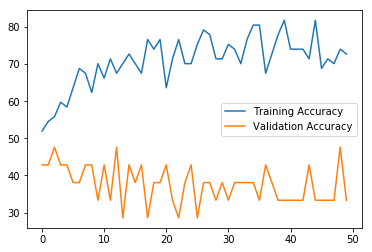

Number of training points:  (78,)
Number of testing points:  (20,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 7
epoch 1 
Best validation accuracy! iteration:7 accuracy: 40.0%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
Best validation accuracy! iteration:84 accuracy: 50.0%
epoch 13 
epoch 14 
epoch 15 
epoch 16 
Best validation accuracy! iteration:112 accuracy: 55.0%
epoch 17 
epoch 18 
epoch 19 
Best validation accuracy! iteration:133 accuracy: 60.0%
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
Best validation accuracy! iteration:301 accuracy: 65.0%
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accur

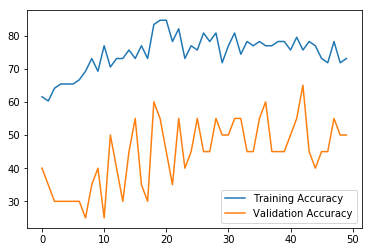

Number of training points:  (79,)
Number of testing points:  (19,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 7
epoch 1 
Best validation accuracy! iteration:7 accuracy: 47.36842105263158%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
Best validation accuracy! iteration:84 accuracy: 52.63157894736842%
epoch 13 
epoch 14 
Best validation accuracy! iteration:98 accuracy: 63.1578947368421%
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 63.1578947368421. Model named nnn_1522183549.


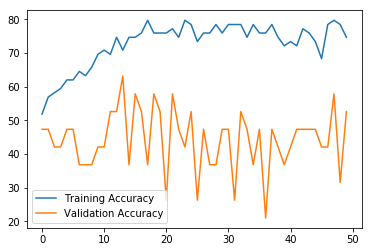

Number of training points:  (79,)
Number of testing points:  (19,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 7
epoch 1 
Best validation accuracy! iteration:7 accuracy: 47.36842105263158%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
Best validation accuracy! iteration:77 accuracy: 57.89473684210526%
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
Best validation accuracy! iteration:126 accuracy: 63.1578947368421%
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 63.1578947368421. Model named nnn_1522183576.


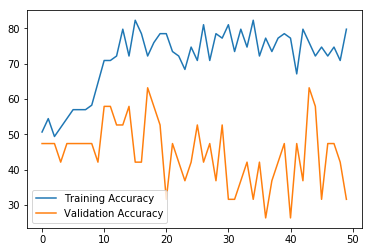

Number of training points:  (79,)
Number of testing points:  (19,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 7
epoch 1 
Best validation accuracy! iteration:7 accuracy: 52.63157894736842%
epoch 2 
epoch 3 
Best validation accuracy! iteration:21 accuracy: 57.89473684210526%
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
Best validation accuracy! iteration:84 accuracy: 63.1578947368421%
epoch 13 
epoch 14 
epoch 15 
Best validation accuracy! iteration:105 accuracy: 68.42105263157895%
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is

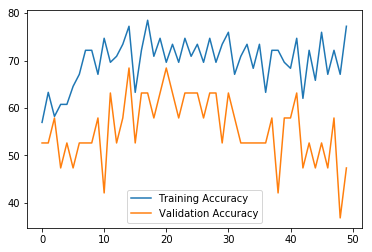

Number of training points:  (77,)
Number of testing points:  (21,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 7
epoch 1 
Best validation accuracy! iteration:7 accuracy: 52.38095238095238%
epoch 2 
Best validation accuracy! iteration:14 accuracy: 57.142857142857146%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 57.142857142857146. Model named nnn_1522183632.


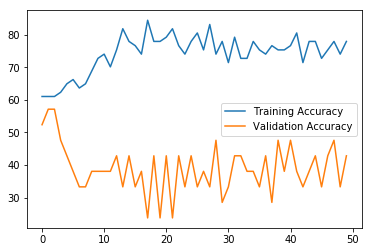

Number of training points:  (78,)
Number of testing points:  (20,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 7
epoch 1 
Best validation accuracy! iteration:7 accuracy: 40.0%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
Best validation accuracy! iteration:42 accuracy: 45.0%
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
Best validation accuracy! iteration:175 accuracy: 55.0%
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 55.0. Model named nnn_1522183658.


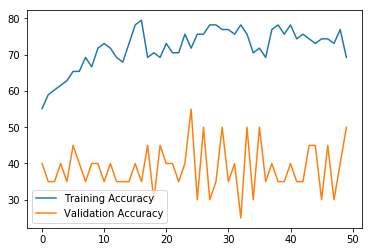

Number of training points:  (79,)
Number of testing points:  (19,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 7
epoch 1 
Best validation accuracy! iteration:7 accuracy: 42.10526315789474%
epoch 2 
Best validation accuracy! iteration:14 accuracy: 47.36842105263158%
epoch 3 
epoch 4 
Best validation accuracy! iteration:28 accuracy: 52.63157894736842%
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
Best validation accuracy! iteration:77 accuracy: 57.89473684210526%
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
Best validation accuracy! iteration:112 accuracy: 63.1578947368421%
epoch 17 
epoch 18 
epoch 19 
Best validation accuracy! iteration:133 accuracy: 68.42105263157895%
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epo

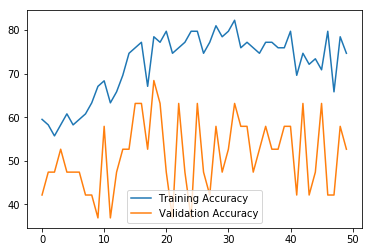

Number of training points:  (79,)
Number of testing points:  (19,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 7
epoch 1 
Best validation accuracy! iteration:7 accuracy: 52.63157894736842%
epoch 2 
Best validation accuracy! iteration:14 accuracy: 57.89473684210526%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 57.89473684210526. Model named nnn_1522183716.


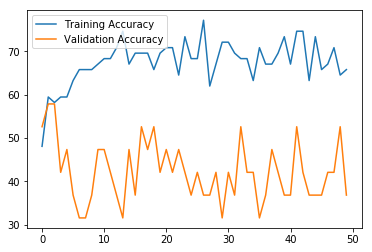

Number of training points:  (79,)
Number of testing points:  (19,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 7
epoch 1 
Best validation accuracy! iteration:7 accuracy: 52.63157894736842%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 52.63157894736842. Model named nnn_1522183742.


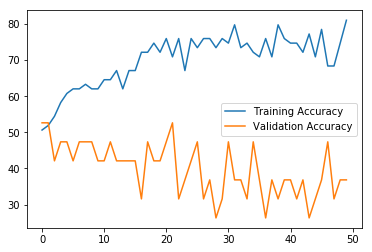

Number of training points:  (77,)
Number of testing points:  (21,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 7
epoch 1 
Best validation accuracy! iteration:7 accuracy: 42.857142857142854%
epoch 2 
epoch 3 
Best validation accuracy! iteration:21 accuracy: 57.142857142857146%
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
Best validation accuracy! iteration:63 accuracy: 66.66666666666666%
epoch 10 
epoch 11 
epoch 12 
Best validation accuracy! iteration:84 accuracy: 71.42857142857143%
epoch 13 
epoch 14 
epoch 15 
Best validation accuracy! iteration:105 accuracy: 76.19047619047619%
epoch 16 
epoch 17 
Best validation accuracy! iteration:119 accuracy: 85.71428571428571%
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 


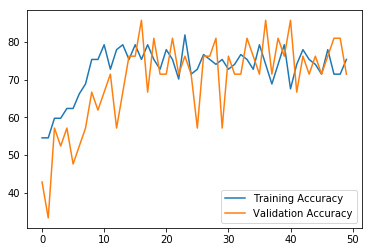

Number of training points:  (78,)
Number of testing points:  (20,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 7
epoch 1 
Best validation accuracy! iteration:7 accuracy: 55.0%
epoch 2 
epoch 3 
Best validation accuracy! iteration:21 accuracy: 60.0%
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 60.0. Model named nnn_1522183798.


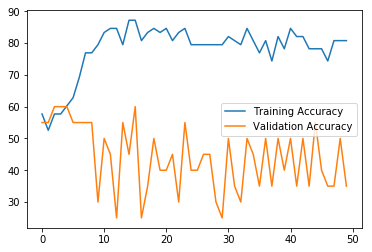

Number of training points:  (79,)
Number of testing points:  (19,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 7
epoch 1 
Best validation accuracy! iteration:7 accuracy: 42.10526315789474%
epoch 2 
epoch 3 
epoch 4 
Best validation accuracy! iteration:28 accuracy: 47.36842105263158%
epoch 5 
epoch 6 
epoch 7 
Best validation accuracy! iteration:49 accuracy: 52.63157894736842%
epoch 8 
Best validation accuracy! iteration:56 accuracy: 57.89473684210526%
epoch 9 
Best validation accuracy! iteration:63 accuracy: 63.1578947368421%
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epo

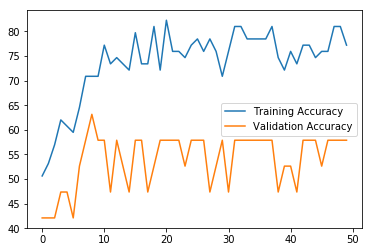

Number of training points:  (79,)
Number of testing points:  (19,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 7
epoch 1 
Best validation accuracy! iteration:7 accuracy: 47.36842105263158%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
Best validation accuracy! iteration:112 accuracy: 52.63157894736842%
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 52.63157894736842. Model named nnn_1522183854.


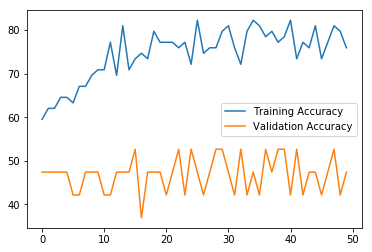

Number of training points:  (79,)
Number of testing points:  (19,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 7
epoch 1 
Best validation accuracy! iteration:7 accuracy: 47.36842105263158%
epoch 2 
epoch 3 
Best validation accuracy! iteration:21 accuracy: 52.63157894736842%
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
Best validation accuracy! iteration:63 accuracy: 63.1578947368421%
epoch 10 
epoch 11 
epoch 12 
Best validation accuracy! iteration:84 accuracy: 68.42105263157895%
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
Best validation accuracy! iteration:133 accuracy: 73.6842105263158%
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epo

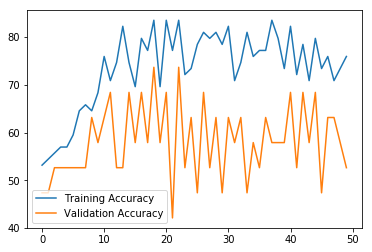

Number of training points:  (77,)
Number of testing points:  (21,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 7
epoch 1 
Best validation accuracy! iteration:7 accuracy: 38.095238095238095%
epoch 2 
Best validation accuracy! iteration:14 accuracy: 42.857142857142854%
epoch 3 
Best validation accuracy! iteration:21 accuracy: 47.61904761904762%
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
Best validation accuracy! iteration:91 accuracy: 52.38095238095238%
epoch 14 
epoch 15 
Best validation accuracy! iteration:105 accuracy: 57.142857142857146%
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47

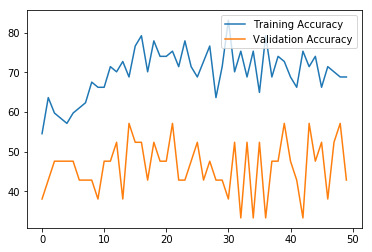

Number of training points:  (78,)
Number of testing points:  (20,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 7
epoch 1 
Best validation accuracy! iteration:7 accuracy: 55.0%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
Best validation accuracy! iteration:35 accuracy: 60.0%
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
Best validation accuracy! iteration:77 accuracy: 65.0%
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
Best validation accuracy! iteration:175 accuracy: 70.0%
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 70.0. Model named nnn_1522183939.


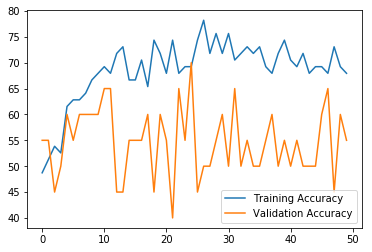

Number of training points:  (79,)
Number of testing points:  (19,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 7
epoch 1 
Best validation accuracy! iteration:7 accuracy: 57.89473684210526%
epoch 2 
epoch 3 
Best validation accuracy! iteration:21 accuracy: 68.42105263157895%
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
Best validation accuracy! iteration:252 accuracy: 73.6842105263158%
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 73.6842105263158. Model named nnn_1522183967.


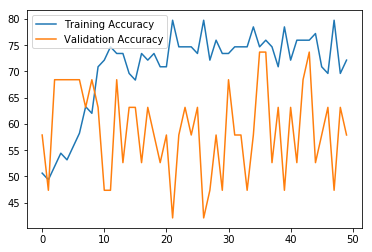

Number of training points:  (79,)
Number of testing points:  (19,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 7
epoch 1 
Best validation accuracy! iteration:7 accuracy: 47.36842105263158%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
Best validation accuracy! iteration:35 accuracy: 52.63157894736842%
epoch 6 
epoch 7 
epoch 8 
Best validation accuracy! iteration:56 accuracy: 57.89473684210526%
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 57.89473684210526. Model named nnn_1522183995.


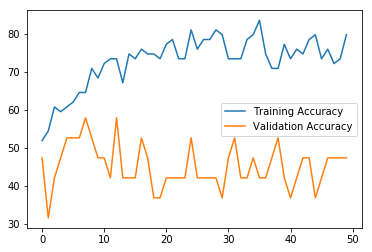

Number of training points:  (79,)
Number of testing points:  (19,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 7
epoch 1 
Best validation accuracy! iteration:7 accuracy: 52.63157894736842%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
Best validation accuracy! iteration:133 accuracy: 57.89473684210526%
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 57.89473684210526. Model named nnn_1522184022.


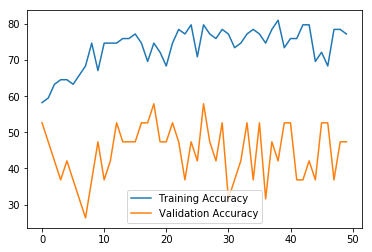

Number of training points:  (77,)
Number of testing points:  (21,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 7
epoch 1 
Best validation accuracy! iteration:7 accuracy: 61.904761904761905%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
Best validation accuracy! iteration:84 accuracy: 71.42857142857143%
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 71.42857142857143. Model named nnn_1522184048.


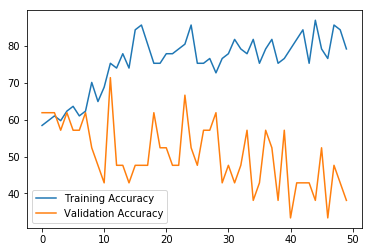

Number of training points:  (78,)
Number of testing points:  (20,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 7
epoch 1 
Best validation accuracy! iteration:7 accuracy: 50.0%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
Best validation accuracy! iteration:35 accuracy: 65.0%
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 65.0. Model named nnn_1522184073.


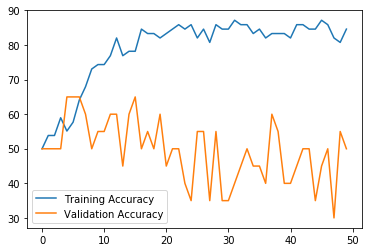

Number of training points:  (79,)
Number of testing points:  (19,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 7
epoch 1 
Best validation accuracy! iteration:7 accuracy: 52.63157894736842%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
Best validation accuracy! iteration:35 accuracy: 57.89473684210526%
epoch 6 
epoch 7 
epoch 8 
Best validation accuracy! iteration:56 accuracy: 73.6842105263158%
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
Best validation accuracy! iteration:126 accuracy: 78.94736842105263%
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is

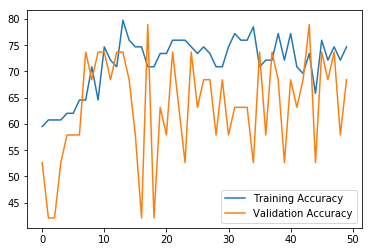

Number of training points:  (79,)
Number of testing points:  (19,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 7
epoch 1 
Best validation accuracy! iteration:7 accuracy: 36.8421052631579%
epoch 2 
Best validation accuracy! iteration:14 accuracy: 42.10526315789474%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
Best validation accuracy! iteration:70 accuracy: 52.63157894736842%
epoch 11 
epoch 12 
Best validation accuracy! iteration:84 accuracy: 57.89473684210526%
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 

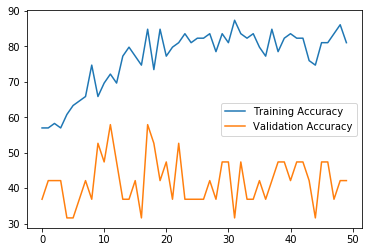

Number of training points:  (79,)
Number of testing points:  (19,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 7
epoch 1 
Best validation accuracy! iteration:7 accuracy: 26.315789473684205%
epoch 2 
Best validation accuracy! iteration:14 accuracy: 31.578947368421055%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
Best validation accuracy! iteration:98 accuracy: 36.8421052631579%
epoch 15 
epoch 16 
Best validation accuracy! iteration:112 accuracy: 42.10526315789474%
epoch 17 
epoch 18 
epoch 19 
Best validation accuracy! iteration:133 accuracy: 52.63157894736842%
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 

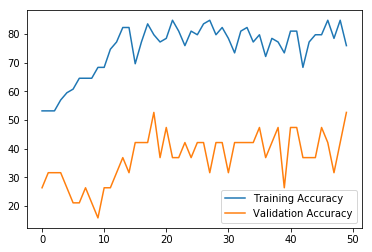

MCI_SMI average accuracy is:  63.046115288220555
MCI_SMI standard deviation is:  8.922675304222482


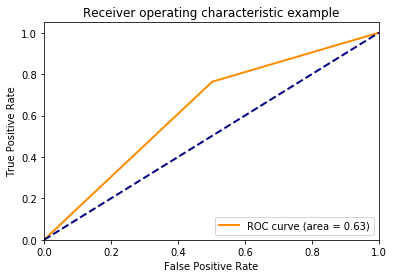

In [19]:
from sklearn.model_selection import RepeatedStratifiedKFold
from CNN_codes.NNN_test import nnn_training
from sklearn.metrics import roc_curve, auc

rskf=RepeatedStratifiedKFold(n_splits=5,n_repeats=5)
store_acc=[]
prediction=[]
truelabel=[]
for train_index,test_index in rskf.split(Xvar_mcismi,y_mcismi):
    print("Number of training points: ",train_index.shape)
    print('Number of testing points: ',test_index.shape)
    X_train,X_test=Xvar_mcismi[train_index],Xvar_mcismi[test_index]
    y_train,y_test=y_mcismi[train_index],y_mcismi[test_index]
    tf.reset_default_graph()
    record_acc,recordtrainacc,recordvalacc,roc_pred,roc_truelabel=nnn_training(X_train,y_train,X_test,y_test,fc_units=[4000,2000,2], l2_norm=0.01,seed=235,
                 learning_rate=1e-3,epoch=50,batch_size=10)
    store_acc.append(record_acc)
    prediction.extend(roc_pred)
    truelabel.extend(roc_truelabel)
    plt.plot(recordtrainacc,label='Training Accuracy')
    plt.plot(recordvalacc,label="Validation Accuracy")
    plt.legend()
    plt.show()

mean_acc=np.mean(np.array(store_acc))
mean_std=np.std(np.array(store_acc))
print('MCI_SMI average accuracy is: ',mean_acc)
print('MCI_SMI standard deviation is: ',mean_std)

fpr,tpr,_=roc_curve(prediction,truelabel)
roc_auc=auc(fpr,tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.savefig('/Users/choyale/Desktop/Deep Learning Project/Figures/IDP_MCISMI_ROC_curve_NNN.jpg')
plt.show()

## Run CNN with 5fold CV for AD_MCI

Number of training points:  (137,)
Number of testing points:  (35,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 13
epoch 1 
Best validation accuracy! iteration:13 accuracy: 65.71428571428572%
epoch 2 
Best validation accuracy! iteration:26 accuracy: 74.28571428571428%
epoch 3 
epoch 4 
epoch 5 
Best validation accuracy! iteration:65 accuracy: 77.14285714285714%
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 77.14285714285714. Model named nnn_1522241260.


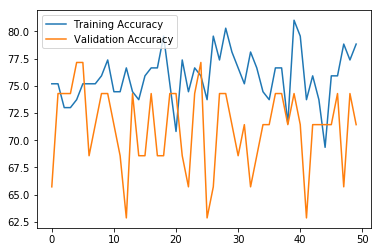

Number of training points:  (137,)
Number of testing points:  (35,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 13
epoch 1 
Best validation accuracy! iteration:13 accuracy: 60.0%
epoch 2 
Best validation accuracy! iteration:26 accuracy: 68.57142857142857%
epoch 3 
Best validation accuracy! iteration:39 accuracy: 71.42857142857143%
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
Best validation accuracy! iteration:104 accuracy: 74.28571428571428%
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
Best validation accuracy! iteration:195 accuracy: 77.14285714285714%
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 


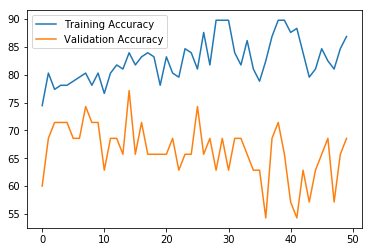

Number of training points:  (138,)
Number of testing points:  (34,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 13
epoch 1 
Best validation accuracy! iteration:13 accuracy: 70.58823529411765%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 70.58823529411765. Model named nnn_1522241327.


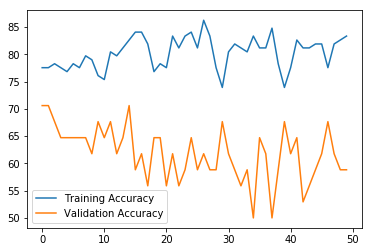

Number of training points:  (138,)
Number of testing points:  (34,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 13
epoch 1 
Best validation accuracy! iteration:13 accuracy: 79.41176470588235%
epoch 2 
Best validation accuracy! iteration:26 accuracy: 82.35294117647058%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 82.35294117647058. Model named nnn_1522241357.


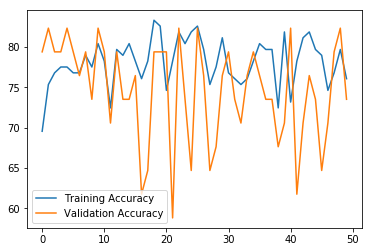

Number of training points:  (138,)
Number of testing points:  (34,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 13
epoch 1 
Best validation accuracy! iteration:13 accuracy: 67.64705882352942%
epoch 2 
Best validation accuracy! iteration:26 accuracy: 73.52941176470588%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
Best validation accuracy! iteration:117 accuracy: 79.41176470588235%
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 79.41176470588235. Model named nnn_1522241388.


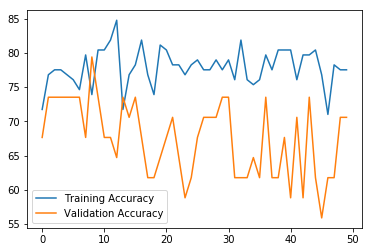

Number of training points:  (137,)
Number of testing points:  (35,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 13
epoch 1 
Best validation accuracy! iteration:13 accuracy: 62.857142857142854%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
Best validation accuracy! iteration:468 accuracy: 68.57142857142857%
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
Best validation accuracy! iteration:637 accuracy: 71.42857142857143%
epoch 50 
Traning ends. The best valid accuracy is 71.42857142857143. Model named nnn_1522241420.


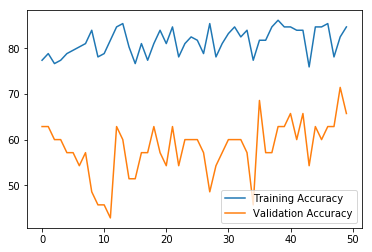

Number of training points:  (137,)
Number of testing points:  (35,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 13
epoch 1 
Best validation accuracy! iteration:13 accuracy: 77.14285714285714%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 77.14285714285714. Model named nnn_1522241454.


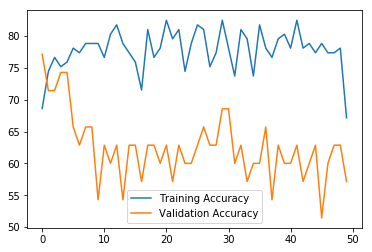

Number of training points:  (138,)
Number of testing points:  (34,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 13
epoch 1 
Best validation accuracy! iteration:13 accuracy: 70.58823529411765%
epoch 2 
Best validation accuracy! iteration:26 accuracy: 79.41176470588235%
epoch 3 
Best validation accuracy! iteration:39 accuracy: 82.35294117647058%
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
Best validation accuracy! iteration:104 accuracy: 85.29411764705883%
epoch 9 
Best validation accuracy! iteration:117 accuracy: 88.23529411764706%
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
Best validation accuracy! iteration:494 accuracy: 91.17647058823529%
epoch 39 
epoch 40

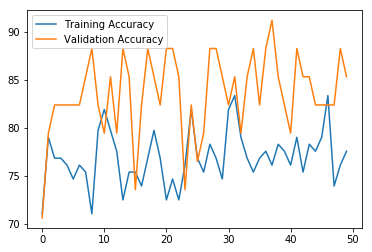

Number of training points:  (138,)
Number of testing points:  (34,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 13
epoch 1 
Best validation accuracy! iteration:13 accuracy: 70.58823529411765%
epoch 2 
epoch 3 
epoch 4 
Best validation accuracy! iteration:52 accuracy: 73.52941176470588%
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
Best validation accuracy! iteration:533 accuracy: 76.47058823529412%
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 76.47058823529412. Model named nnn_1522241520.


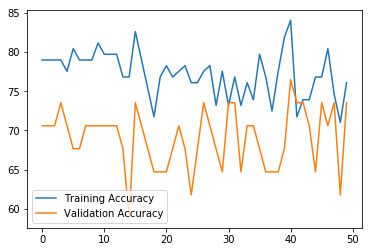

Number of training points:  (138,)
Number of testing points:  (34,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 13
epoch 1 
Best validation accuracy! iteration:13 accuracy: 76.47058823529412%
epoch 2 
Best validation accuracy! iteration:26 accuracy: 79.41176470588235%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
Best validation accuracy! iteration:598 accuracy: 82.35294117647058%
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 82.35294117647058. Model named nnn_1522241552.


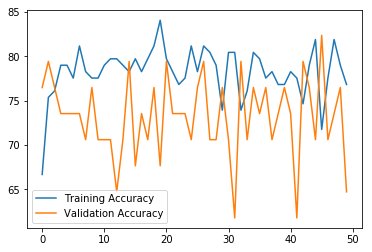

Number of training points:  (137,)
Number of testing points:  (35,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 13
epoch 1 
Best validation accuracy! iteration:13 accuracy: 71.42857142857143%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 71.42857142857143. Model named nnn_1522241584.


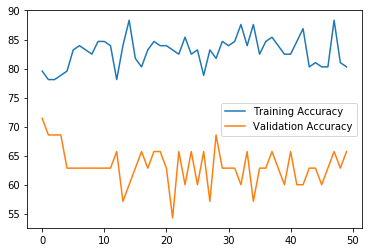

Number of training points:  (137,)
Number of testing points:  (35,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 13
epoch 1 
Best validation accuracy! iteration:13 accuracy: 77.14285714285714%
epoch 2 
Best validation accuracy! iteration:26 accuracy: 82.85714285714286%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 82.85714285714286. Model named nnn_1522241614.


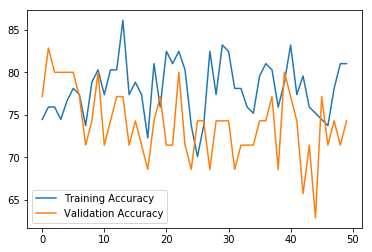

Number of training points:  (138,)
Number of testing points:  (34,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 13
epoch 1 
Best validation accuracy! iteration:13 accuracy: 73.52941176470588%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 73.52941176470588. Model named nnn_1522241645.


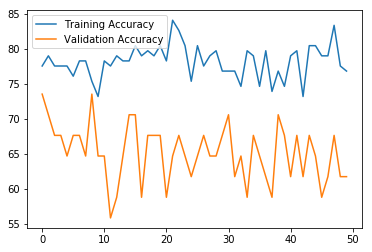

Number of training points:  (138,)
Number of testing points:  (34,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 13
epoch 1 
Best validation accuracy! iteration:13 accuracy: 67.64705882352942%
epoch 2 
Best validation accuracy! iteration:26 accuracy: 70.58823529411765%
epoch 3 
Best validation accuracy! iteration:39 accuracy: 73.52941176470588%
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 73.52941176470588. Model named nnn_1522241675.


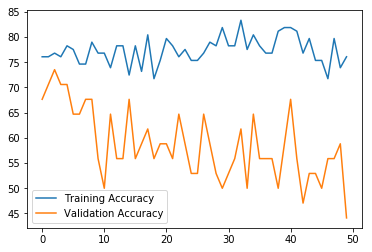

Number of training points:  (138,)
Number of testing points:  (34,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 13
epoch 1 
Best validation accuracy! iteration:13 accuracy: 82.35294117647058%
epoch 2 
Best validation accuracy! iteration:26 accuracy: 85.29411764705883%
epoch 3 
Best validation accuracy! iteration:39 accuracy: 88.23529411764706%
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 88.23529411764706. Model named nnn_1522241707.


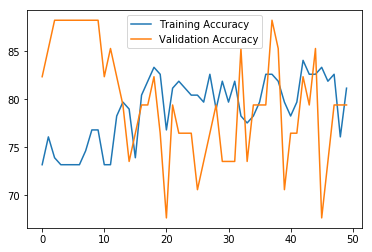

Number of training points:  (137,)
Number of testing points:  (35,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 13
epoch 1 
Best validation accuracy! iteration:13 accuracy: 57.142857142857146%
epoch 2 
Best validation accuracy! iteration:26 accuracy: 62.857142857142854%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
Best validation accuracy! iteration:78 accuracy: 71.42857142857143%
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 71.42857142857143. Model named nnn_1522241739.


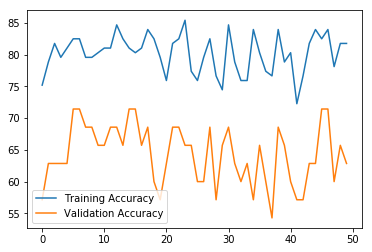

Number of training points:  (137,)
Number of testing points:  (35,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 13
epoch 1 
Best validation accuracy! iteration:13 accuracy: 57.142857142857146%
epoch 2 
Best validation accuracy! iteration:26 accuracy: 65.71428571428572%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
Best validation accuracy! iteration:78 accuracy: 71.42857142857143%
epoch 7 
Best validation accuracy! iteration:91 accuracy: 74.28571428571428%
epoch 8 
Best validation accuracy! iteration:104 accuracy: 77.14285714285714%
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
Best validation accuracy! iteration:195 accuracy: 80.0%
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
e

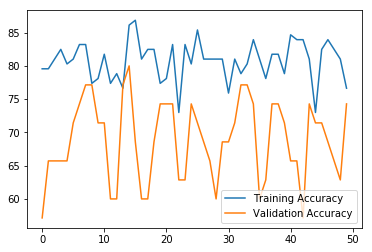

Number of training points:  (138,)
Number of testing points:  (34,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 13
epoch 1 
Best validation accuracy! iteration:13 accuracy: 76.47058823529412%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
Best validation accuracy! iteration:208 accuracy: 79.41176470588235%
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Best validation accuracy! iteration:650 accuracy: 82.35294117647058%
Traning ends. The best valid accuracy is 82.35294117647058. Model named nnn_1522241806.


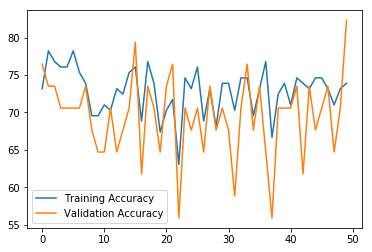

Number of training points:  (138,)
Number of testing points:  (34,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 13
epoch 1 
Best validation accuracy! iteration:13 accuracy: 79.41176470588235%
epoch 2 
Best validation accuracy! iteration:26 accuracy: 82.35294117647058%
epoch 3 
Best validation accuracy! iteration:39 accuracy: 85.29411764705883%
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 85.29411764705883. Model named nnn_1522241838.


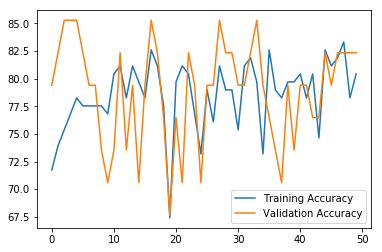

Number of training points:  (138,)
Number of testing points:  (34,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 13
epoch 1 
Best validation accuracy! iteration:13 accuracy: 82.35294117647058%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 82.35294117647058. Model named nnn_1522241870.


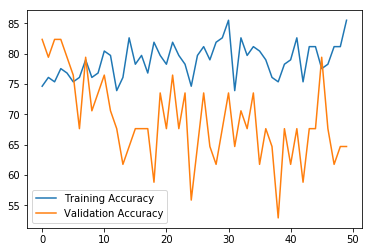

Number of training points:  (137,)
Number of testing points:  (35,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 13
epoch 1 
Best validation accuracy! iteration:13 accuracy: 68.57142857142857%
epoch 2 
Best validation accuracy! iteration:26 accuracy: 71.42857142857143%
epoch 3 
epoch 4 
Best validation accuracy! iteration:52 accuracy: 74.28571428571428%
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
Best validation accuracy! iteration:312 accuracy: 77.14285714285714%
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accurac

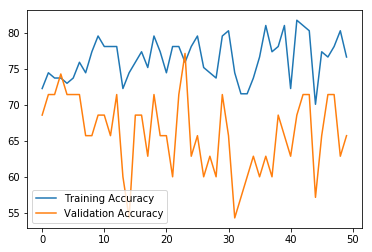

Number of training points:  (137,)
Number of testing points:  (35,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 13
epoch 1 
Best validation accuracy! iteration:13 accuracy: 62.857142857142854%
epoch 2 
Best validation accuracy! iteration:26 accuracy: 65.71428571428572%
epoch 3 
Best validation accuracy! iteration:39 accuracy: 71.42857142857143%
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
Best validation accuracy! iteration:104 accuracy: 74.28571428571428%
epoch 9 
epoch 10 
epoch 11 
Best validation accuracy! iteration:143 accuracy: 77.14285714285714%
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
Best validation accuracy! iteration:208 accuracy: 80.0%
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 


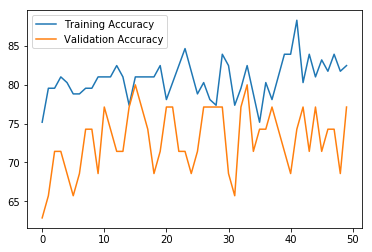

Number of training points:  (138,)
Number of testing points:  (34,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 13
epoch 1 
Best validation accuracy! iteration:13 accuracy: 61.76470588235294%
epoch 2 
Best validation accuracy! iteration:26 accuracy: 64.70588235294117%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
Best validation accuracy! iteration:130 accuracy: 67.64705882352942%
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 67.64705882352942. Model named nnn_1522241968.


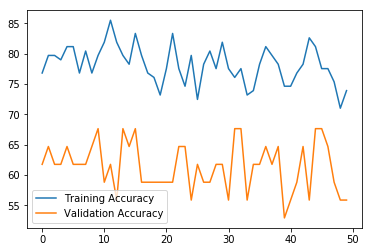

Number of training points:  (138,)
Number of testing points:  (34,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 13
epoch 1 
Best validation accuracy! iteration:13 accuracy: 73.52941176470588%
epoch 2 
Best validation accuracy! iteration:26 accuracy: 76.47058823529412%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
Best validation accuracy! iteration:130 accuracy: 79.41176470588235%
epoch 11 
epoch 12 
epoch 13 
epoch 14 
Best validation accuracy! iteration:182 accuracy: 82.35294117647058%
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
Best validation accuracy! iteration:260 accuracy: 85.29411764705883%
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 

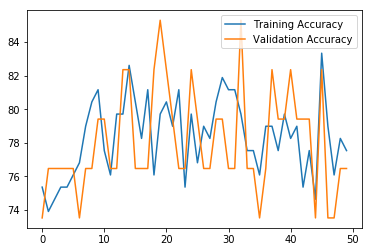

Number of training points:  (138,)
Number of testing points:  (34,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 13
epoch 1 
Best validation accuracy! iteration:13 accuracy: 79.41176470588235%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 79.41176470588235. Model named nnn_1522242035.


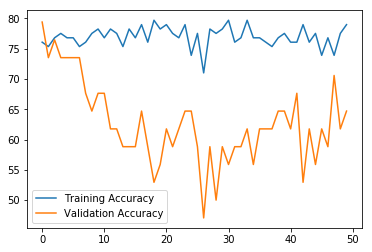

AD_MCI average accuracy is:  78.62857142857143
AD_MCI standard deviation is:  5.73829459482533


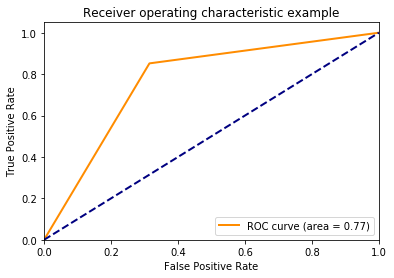

In [22]:
from sklearn.model_selection import RepeatedStratifiedKFold
from CNN_codes.NNN_test import nnn_training
from sklearn.metrics import roc_curve, auc

rskf=RepeatedStratifiedKFold(n_splits=5,n_repeats=5)
store_acc=[]
prediction=[]
truelabel=[]
for train_index,test_index in rskf.split(Xvar_admci,y_admci):
    print("Number of training points: ",train_index.shape)
    print('Number of testing points: ',test_index.shape)
    X_train,X_test=Xvar_admci[train_index],Xvar_admci[test_index]
    y_train,y_test=y_admci[train_index],y_admci[test_index]
    tf.reset_default_graph()
    record_acc,recordtrainacc,recordvalacc,roc_pred,roc_truelabel=nnn_training(X_train,y_train,X_test,y_test,fc_units=[4000,2000,2],l2_norm=0.01,seed=235,
                 learning_rate=1e-3,epoch=50,batch_size=10)
    store_acc.append(record_acc)
    prediction.extend(roc_pred)
    truelabel.extend(roc_truelabel)
    plt.plot(recordtrainacc,label='Training Accuracy')
    plt.plot(recordvalacc,label="Validation Accuracy")
    plt.legend()
    plt.show()

mean_acc=np.mean(np.array(store_acc))
mean_std=np.std(np.array(store_acc))
print('AD_MCI average accuracy is: ',mean_acc)
print('AD_MCI standard deviation is: ',mean_std)

fpr,tpr,_=roc_curve(prediction,truelabel)
roc_auc=auc(fpr,tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.savefig('/Users/choyale/Desktop/Deep Learning Project/Figures/IDP_ADMCI_ROC_curve_NNN.jpg')
plt.show()